   ## Análise de Dados - Campeonato Brasileiro de 2003 à 2023

No contexto do futebol, os números e estatísticas desempenham um papel fundamental na compreensão da dinâmica e competitividade do esporte mais popular do mundo. A análise dos dados dos jogos não apenas revela o desempenho dos clubes, mas também oferece insights valiosos sobre as estratégias, tendências e potencialidades de cada equipe.

Ao explorarmos os números dos jogos, mergulhamos em um universo rico em informações, onde a vitória e a derrota se entrelaçam para contar a história de cada time. Dos grandes clubes historicamente vitoriosos aos desafios enfrentados pelos que buscam sua redenção, os dados estatísticos nos conduzem por um caminho de descobertas e reflexões.

Assim, ao contextualizar os dados dos jogos de futebol, somos conduzidos a uma jornada de análise e reflexão, onde os números se tornam mais do que estatísticas, mas sim ferramentas poderosas para compreender e valorizar a essência competitiva e apaixonante desse esporte que cativa multidões ao redor do mundo.


## Referência 
### Livro - Os Números do jogo

O livro destaca a importância da análise estatística no futebol, apresentando abordagens surpreendentes, a dinâmica do esporte em relação ao elo mais fraco e a verdade por trás da demissão de treinadores. Com prefácio de Paulo Vinícius Coelho, o PVC, a obra promete mudar a forma como vemos o jogo, desafiando conceitos estabelecidos e mostrando que a revolução dos dados está redefinindo a maneira de compreender e jogar futebol.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('campeonato-brasileiro-full.csv')

In [17]:
# Corrigindo os nomes das colunas
colunas_corrigidas = ['formacao_mandante', 'formacao_visitante', 'tecnico_mandante', 'tecnico_visitante']

# Alterando os valores nulos com 'Normal'
df[colunas_corrigidas] = df[colunas_corrigidas].fillna('Normal')

In [18]:
df.head(5)

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/03/2003,16:00,Guarani,Vasco,Normal,Normal,Normal,Normal,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,Normal,Normal,Normal,Normal,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,Normal,Normal,Normal,Normal,-,Maracanã,1,1,RJ,PR
3,4,1,30/03/2003,16:00,Goias,Paysandu,Normal,Normal,Normal,Normal,-,Serra Dourada,2,2,GO,PA
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,Normal,Normal,Normal,Normal,-,Beira Rio,1,1,RS,SP


## Aqui verificamos a porcentagem de vitória quando um time joga dentro ou fora de casa

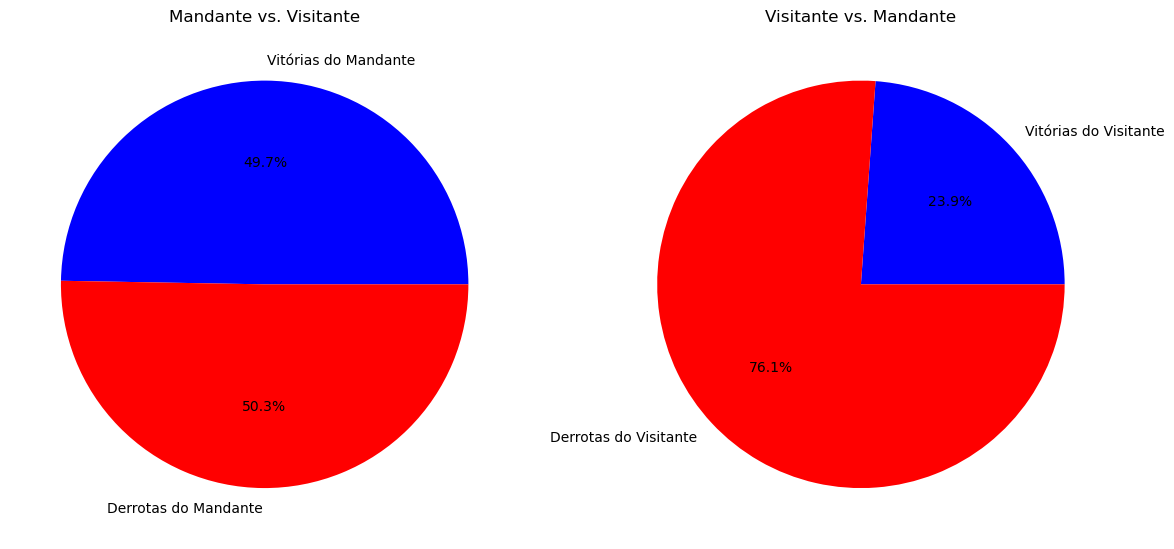

In [19]:
# Calcula as porcentagens de vitórias do mandante e do visitante
porcentagem_vitorias_mandante = (df[df['mandante_Placar'] > df['visitante_Placar']].shape[0] / df.shape[0]) * 100
porcentagem_vitorias_visitante = (df[df['visitante_Placar'] > df['mandante_Placar']].shape[0] / df.shape[0]) * 100

# Cria os dois gráficos de pizza em uma linha de código
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie([porcentagem_vitorias_mandante, 100 - porcentagem_vitorias_mandante], colors=['blue', 'red'], labels=['Vitórias do Mandante', 'Derrotas do Mandante'], autopct='%1.1f%%')
plt.title('Mandante vs. Visitante')

plt.subplot(1, 2, 2)
plt.pie([porcentagem_vitorias_visitante, 100 - porcentagem_vitorias_visitante], colors=['blue', 'red'], labels=['Vitórias do Visitante', 'Derrotas do Visitante'], autopct='%1.1f%%')
plt.title('Visitante vs. Mandante')

plt.tight_layout()
plt.show()

## Quantidade de partidas em que o resultado foi igual ou superior a 3 gols e em que ambos os times marcaram 3 gols ou mais:

In [24]:
# Conta o número de partidas em que apenas o mandante teve placar maior que 3
apenas_mandante_maior_que_3 = df[(df['mandante_Placar'] > 3) & (df['visitante_Placar'] <= 3)].shape[0]

# Conta o número de partidas em que apenas o visitante teve placar maior que 3
apenas_visitante_maior_que_3 = df[(df['mandante_Placar'] <= 3) & (df['visitante_Placar'] > 3)].shape[0]

# Conta o número de partidas em que tanto mandante quanto visitante tiveram placar maior que 3
ambos_maior_que_3 = df[(df['mandante_Placar'] > 3) & (df['visitante_Placar'] > 3)].shape[0]

print(f'O número de partidas em que apenas o mandante teve placar maior que 3 foi: {apenas_mandante_maior_que_3}')
print(f'O número de partidas em que apenas o visitante teve placar maior que 3 foi: {apenas_visitante_maior_que_3}')
print(f'O número de partidas em que tanto mandante quanto visitante tiveram placar maior que 3 foi: {ambos_maior_que_3}')

O número de partidas em que apenas o mandante teve placar maior que 3 foi: 578
O número de partidas em que apenas o visitante teve placar maior que 3 foi: 179
O número de partidas em que tanto mandante quanto visitante tiveram placar maior que 3 foi: 16


## Número de vitórias por estado:

In [6]:
# Calcula o número de partidas vencidas por cada estado como time da casa
vitorias_mandante_por_estado = df[df['mandante_Placar'] > df['visitante_Placar']].groupby('mandante_Estado').size()

# Calcula o número de partidas vencidas por cada estado como time visitante
vitorias_visitante_por_estado = df[df['visitante_Placar'] > df['mandante_Placar']].groupby('visitante_Estado').size()

# Combinaras vitórias de mandante e visitante por estado
vitorias_por_estado = vitorias_mandante_por_estado.add(vitorias_visitante_por_estado, fill_value=0)

# Ordena as vitórias por estado de forma decrescente
vitorias_por_estado_ordenadas = vitorias_por_estado.sort_values(ascending=False)

# Mostra todos os estados e o número de vitórias ordenados decrescentemente
print('Vitórias por Estado:')
for estado, vitorias in vitorias_por_estado_ordenadas.items():
    print(f'{estado}: {int(vitorias)}')

Vitórias por Estado:
SP: 1691
RJ: 1131
RS: 740
MG: 698
PR: 581
SC: 335
GO: 281
BA: 250
PE: 200
CE: 180
PA: 41
MT: 34
DF: 10
AL: 8
RN: 4


## Os 20 times com maior número de vitória:

In [7]:
# Calculr o número de vitórias de times como mandante
vitorias_mandante = df[df['mandante_Placar'] > df['visitante_Placar']].groupby('mandante').size()

# Calcula o número de vitórias de times como visitante
vitorias_visitante = df[df['visitante_Placar'] > df['mandante_Placar']].groupby('visitante').size()

# Combina as vitórias de mandante e visitante por time
vitorias_total = vitorias_mandante.add(vitorias_visitante, fill_value=0)

# Identifica os 20 times mais vitoriosos
times_mais_vencedores = vitorias_total.sort_values(ascending=False).head(20)

# Mostra os 20 times mais vitoriosos
print('Top 20 Times Mais Vitoriosos:')
for time, vitorias in times_mais_vencedores.items():
    print(f'{time}: {int(vitorias)} vitórias')

Top 20 Times Mais Vitoriosos:
Sao Paulo: 365 vitórias
Flamengo: 354 vitórias
Santos: 340 vitórias
Internacional: 339 vitórias
Palmeiras: 329 vitórias
Atletico-MG: 327 vitórias
Corinthians: 326 vitórias
Fluminense: 322 vitórias
Gremio: 316 vitórias
Athletico-PR: 309 vitórias
Cruzeiro: 304 vitórias
Botafogo-RJ: 247 vitórias
Goias: 209 vitórias
Vasco: 208 vitórias
Coritiba: 189 vitórias
Figueirense: 142 vitórias
Sport: 131 vitórias
Bahia: 127 vitórias
Vitoria: 123 vitórias
Ponte Preta: 114 vitórias


## Os 20 times com o maior número de derrotas:

In [8]:
# Calcula o número de derrotas de times como mandante
derrotas_mandante = df[df['mandante_Placar'] < df['visitante_Placar']].groupby('mandante').size()

# Calcula o número de derrotas de times como visitante
derrotas_visitante = df[df['visitante_Placar'] < df['mandante_Placar']].groupby('visitante').size()

# Combina as derrotas de mandante e visitante por time
derrotas_total = derrotas_mandante.add(derrotas_visitante, fill_value=0)

# Identifica os 20 times com mais derrotas
times_mais_derrotados = derrotas_total.sort_values(ascending=False).head(20)

# Mostra os 20 times com mais derrotas
print('Top 20 Times Mais Derrotados (Mandante e Visitante):')
for time, derrotas in times_mais_derrotados.items():
    print(f'{time}: {int(derrotas)} derrotas')

Top 20 Times Mais Derrotados (Mandante e Visitante):
Fluminense: 283 derrotas
Athletico-PR: 282 derrotas
Santos: 261 derrotas
Botafogo-RJ: 259 derrotas
Atletico-MG: 253 derrotas
Coritiba: 250 derrotas
Flamengo: 243 derrotas
Goias: 239 derrotas
Internacional: 239 derrotas
Gremio: 237 derrotas
Cruzeiro: 235 derrotas
Vasco: 234 derrotas
Corinthians: 225 derrotas
Sao Paulo: 224 derrotas
Palmeiras: 215 derrotas
Sport: 180 derrotas
Bahia: 178 derrotas
Vitoria: 174 derrotas
Figueirense: 172 derrotas
Ponte Preta: 157 derrotas


## Os campeões de 2003 a 2023

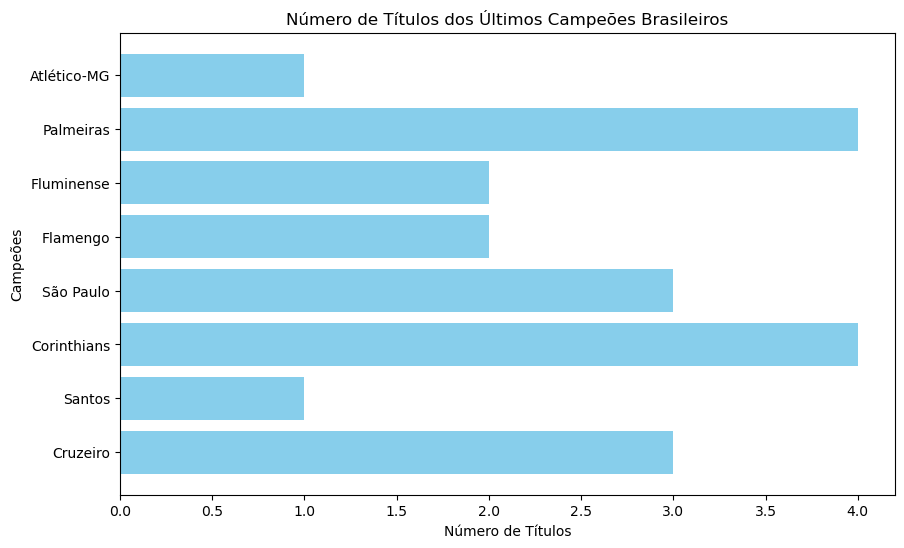

In [9]:
# Dados dos campeões de 2003 a 2023
campeoes = ['Cruzeiro', 'Santos', 'Corinthians', 'São Paulo', 'Flamengo', 'Fluminense', 'Palmeiras', 'Atlético-MG']
titulos = [3, 1, 4, 3, 2, 2, 4, 1]

# Cria gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(campeoes, titulos, color='skyblue')
plt.xlabel('Número de Títulos')
plt.ylabel('Campeões')
plt.title('Número de Títulos dos Últimos Campeões Brasileiros')

# Exibe o gráfico
plt.show()

## Os clubes mais valiosos do Brasil

C:\Users\BrunoPrado\AppData\Local\Temp\ipykernel_20668\99051576.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


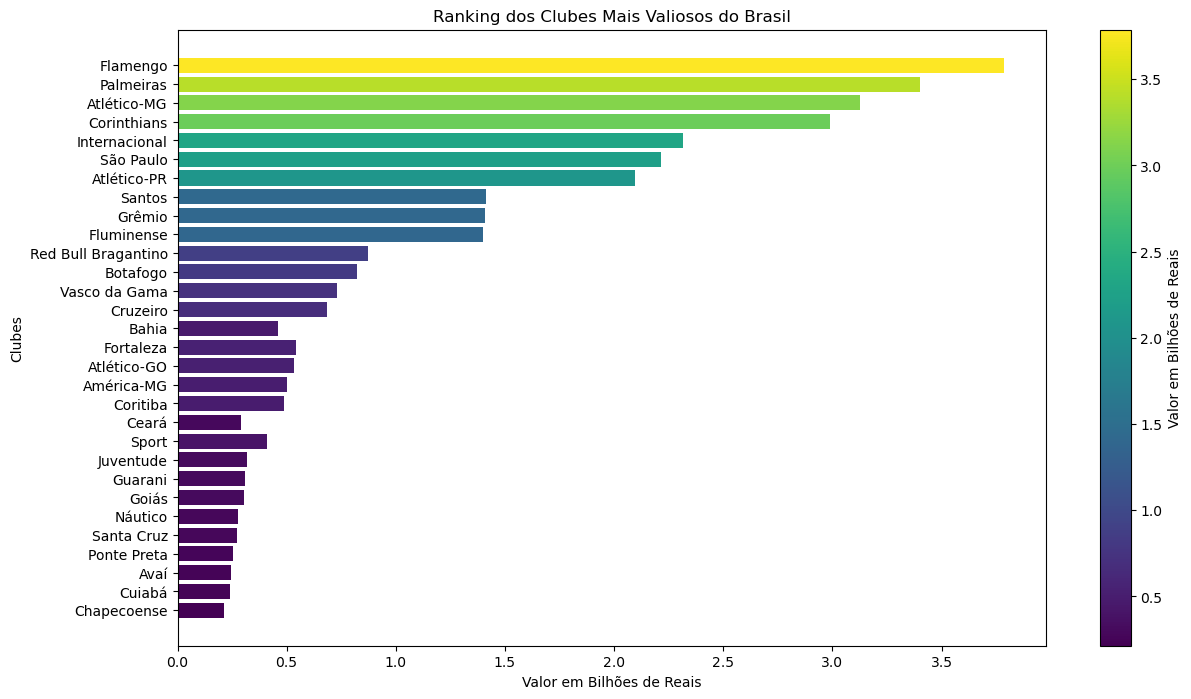

In [10]:
import matplotlib.colors as mcolors

# Dados dos clubes mais valiosos do Brasil
clubes = ['Flamengo', 'Palmeiras', 'Atlético-MG', 'Corinthians', 'Internacional', 'São Paulo', 'Atlético-PR', 
          'Santos', 'Grêmio', 'Fluminense', 'Red Bull Bragantino', 'Botafogo', 'Vasco da Gama', 'Cruzeiro', 'Bahia', 
          'Fortaleza', 'Atlético-GO', 'América-MG', 'Coritiba', 'Ceará', 'Sport', 'Juventude', 'Guarani', 'Goiás', 
          'Náutico', 'Santa Cruz', 'Ponte Preta', 'Avaí', 'Cuiabá', 'Chapecoense']
valores = [3.787, 3.4, 3.127, 2.991, 2.314, 2.214, 2.094, 1.415, 1.407, 1.399, 0.872, 0.823, 0.73, 0.686, 0.459, 
           0.545, 0.532, 0.5, 0.49, 0.292, 0.408, 0.32, 0.308, 0.306, 0.277, 0.272, 0.256, 0.243, 0.242, 0.214]

# Cria em degradê com base nos valores
norm = plt.Normalize(min(valores), max(valores))
colors = plt.cm.viridis(norm(valores))

# Cria o gráfico
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.barh(clubes, valores, color=colors)

# Adiciona barra de cores
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Valor em Bilhões de Reais')

ax.set_xlabel('Valor em Bilhões de Reais')
ax.set_ylabel('Clubes')
plt.title('Ranking dos Clubes Mais Valiosos do Brasil')
plt.gca().invert_yaxis()  # Inverter a ordem dos clubes
plt.show()

## Conclusão

### Com base na análise dos dados fornecidos, destacamos o desempenho dos estados de São Paulo , Rio de Janeiro e Minas Gerais nos campeonatos, considerando o número de vitórias e títulos conquistados pelos times.


Em São Paulo, observamos o seguinte:
Maior número de vitórias: 1691
Títulos dos times durante o período: 12 (Santos, Corinthians, São Paulo, Palmeiras)

No Rio de Janeiro:
Maior número de vitórias: 1131
Títulos dos times durante o período: 4 (Flamengo, Fluminense)

Em Minas Gerais:
Maior número de vitórias: 698
Títulos dos times durante o período: 4 (Atlético-MG, Cruzeiro)


A análise evidencia que São Paulo se destaca como o estado com maior número de vitórias e títulos no futebol brasileiro. Já Minas Gerais apresenta um desempenho consistente em vitórias, com dois títulos recentes, enquanto o Rio de Janeiro teve um bom número de vitórias, porém com menos títulos nos últimos anos.


Essa relação entre vitórias e títulos reflete a força e a regularidade dos times de futebol de cada estado nos campeonatos, com São Paulo se consolidando como líder em conquistas. A distribuição de vitórias por estado destaca a hegemonia de São Paulo, seguido pelo Rio de Janeiro e Minas Gerais em suas respectivas performances.


Essas informações são essenciais para compreender o panorama esportivo e a competitividade entre os estados brasileiros no futebol, fornecendo insights valiosos sobre o desempenho dos times e suas conquistas nos campeonatos. Este contexto é fundamental para analisar tendências, padrões e oportunidades de melhoria para os clubes e para o fortalecimento do cenário esportivo nacional.


Ao considerar a relação entre o valor de mercado dos clubes mais valiosos e seu desempenho em termos de títulos e vitórias, observamos que há uma tendência de os clubes com maior valor também possuírem um histórico de conquistas expressivo. Essa correlação pode indicar a relevância da estrutura financeira e investimentos na obtenção de resultados esportivos positivos.


Além disso, a análise por estado mostra como os clubes mais valiosos se destacam nas respectivas regiões, consolidando sua presença e competitividade nos campeonatos locais e nacionais. Essa análise cruzada entre valor de mercado, títulos e vitórias oferece insights importantes sobre a relação entre o aspecto financeiro e o sucesso esportivo no cenário do futebol brasileiro.

## DataSet
https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol